In [1]:
import numpy as np

import glob

import os

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import scipy.stats as st

In [44]:
# BASEDIR = 'clusters/tsne/densenet/'
BASEDIR = 'clusters/tsne/inception_v3/'
emb = np.load(os.path.join(BASEDIR, 'e.npy'))

emb[:,0] /= np.max(emb[:,0])
emb[:,1] /= np.max(emb[:,1])

colors = np.array([[239, 240, 57], # Orange
                   [225, 30, 27],  # Red
#                    [225, 27, 27],  # Red
                   [11, 147, 8], # Green
                   [221, 133, 215], # Pink
                   [0,0,0],
                  ]) / 255.

colors = np.array([[32,142,183], 
                   [155,224,230], 
                   [7,77,101], 
                   [87,236,192]]) / 255.

colors= np.array([(189, 131, 110), (235,18,65), (30,67,141), (242,220,236)]) / 255.
print(colors)

[[0.74117647 0.51372549 0.43137255]
 [0.92156863 0.07058824 0.25490196]
 [0.11764706 0.2627451  0.55294118]
 [0.94901961 0.8627451  0.9254902 ]]


In [45]:
label = np.load(os.path.join(BASEDIR, 'y.npy'))
label[label>1] -= 1

labelpred = np.load(os.path.join(BASEDIR, 'ypred.npy'))
labelpred[labelpred>1] -= 1

print(emb.shape)
print(label.shape)
print(labelpred.shape)

(2641, 2)
(2641,)
(2641,)


-0.8976464695406121 0.6064885466787202 -0.5133354040752144 0.8951602296253826
0.48244047990216166
-0.9902387788547933 1.0194180854438235 -1.1907217490666853 1.199156522642426
0.3037905577811501
-0.9485894523228764 0.7705128687761796 -1.0074866119684 0.8650699978168458
0.389852025264422
-1.0004697566278942 1.1818608869661722 -1.328653473182095 1.1485433666146654
0.3248495995791504


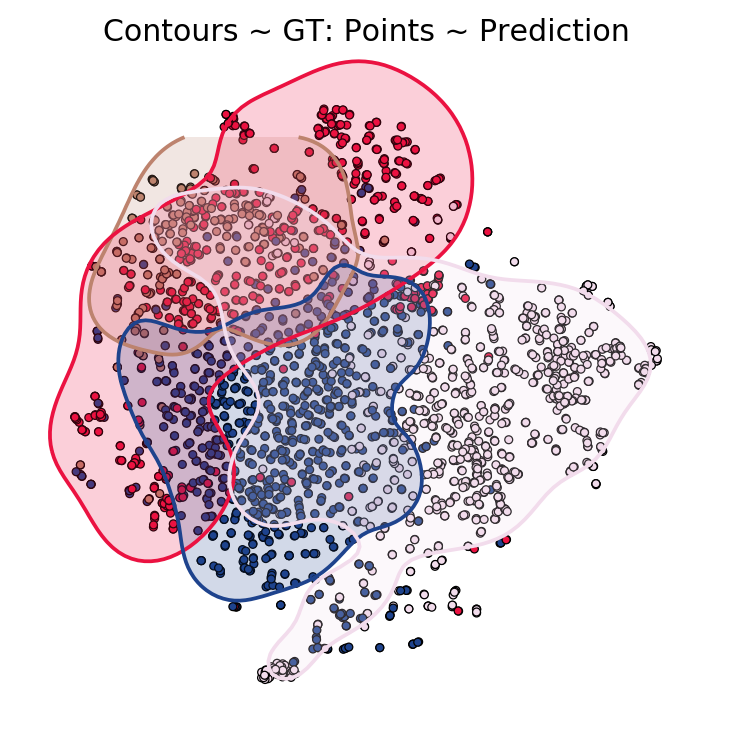

In [112]:
# https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
plt.figure(figsize=(5,5), dpi=180)
main_ax = plt.gca()

# fig, axs = plt.subplots(1,4, figsize=(16,4), dpi=300)

cstrings = ['y', 'r', 'g', 'm']
strs = ['GG3', 'HG', 'BN', 'ST']

cc = np.stack([colors[k] for k in labelpred], axis=0)
main_ax.scatter(emb[:,0], emb[:,1], s=10, edgecolors='k', linewidth=0.5, c=cc)

for k in range(4):

    cmap = ListedColormap(colors[k])
    yc = label == k

    x = emb[yc, 0]
    y = emb[yc, 1]
    
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    
    print(xmin, xmax, ymin, ymax)
    
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    cutoff = np.quantile(f, 0.75)
    print(cutoff)

    color = colors[k]
#     main_ax.plot(x_, y_, '.', ms=8, mew=0.1, mec='k', c=color, label=strs[k])
    main_ax.contour(xx, yy, f, [cutoff], antialiased=True, cmap=cmap)
    main_ax.contourf(xx, yy, f, [cutoff, f.max() ], extend='max', alpha=0.2, corner_mask=0, cmap=cmap)
    
#     plt.matshow(f); plt.colorbar()
    
main_ax.set_axis_off()
# main_ax.legend()
main_ax.set_title('Contours ~ GT: Points ~ Prediction')

plt.savefig('/home/ing/dropbox/projects/gleasongrade/contours:gt_points:pred.png', bbox_inches='tight')

-0.8976464695406121 0.6064885466787202 -0.5133354040752144 0.8951602296253826
0.48244047990216166
-0.9902387788547933 1.0194180854438235 -1.1907217490666853 1.199156522642426
0.3037905577811501
-0.9485894523228764 0.7705128687761796 -1.0074866119684 0.8650699978168458
0.389852025264422
-1.0004697566278942 1.1818608869661722 -1.328653473182095 1.1485433666146654
0.3248495995791504


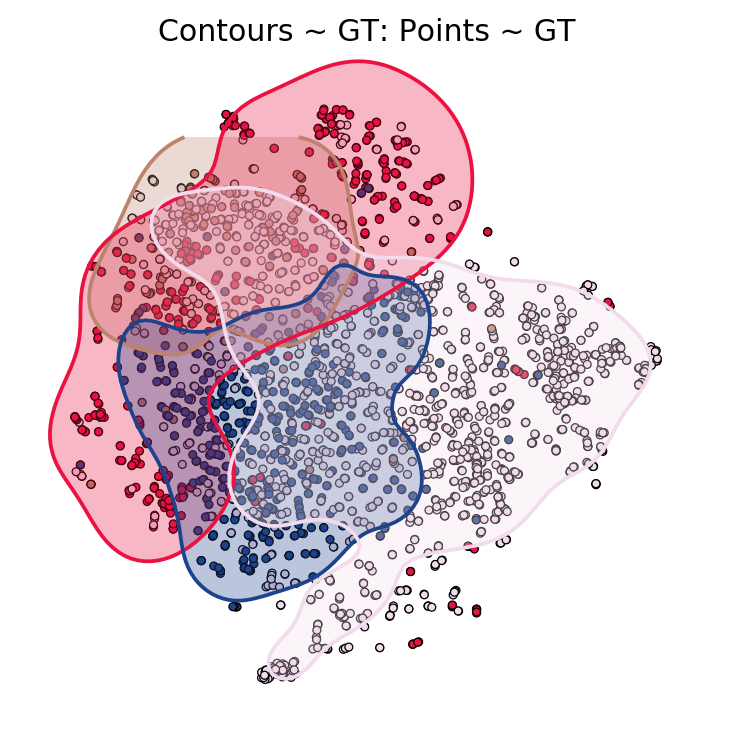

In [113]:
# https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
plt.figure(figsize=(5,5), dpi=180)
main_ax = plt.gca()

# fig, axs = plt.subplots(1,4, figsize=(16,4), dpi=300)

cstrings = ['y', 'r', 'g', 'm']
strs = ['GG3', 'HG', 'BN', 'ST']

cc = np.stack([colors[k] for k in label], axis=0)
main_ax.scatter(emb[:,0], emb[:,1], s=10, edgecolors='k', linewidth=0.5, c=cc)

for k in range(4):
    cmap = ListedColormap(colors[k])
    yc = label == k

    x = emb[yc, 0]
    y = emb[yc, 1]
    
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    
    print(xmin, xmax, ymin, ymax)
    
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    cutoff = np.quantile(f, 0.75)
    print(cutoff)

    color = colors[k]
#     main_ax.plot(x, y, '.', ms=8, mew=0.1, mec='k', c=color, label=strs[k])
    main_ax.contour(xx, yy, f,  [cutoff], antialiased=True, cmap=cmap)
    main_ax.contourf(xx, yy, f, [cutoff, f.max()], extend='max', alpha=0.3, cmap=cmap)
    
# main_ax.set_xticks([])
# main_ax.set_yticks([])
main_ax.set_axis_off()
# main_ax.legend()
main_ax.set_title('Contours ~ GT: Points ~ GT')
plt.savefig('/home/ing/dropbox/projects/gleasongrade/contours:gt_points:gt.png', bbox_inches='tight')